# RANCANG BANGUN ARSITEKTUR CONVOLUTIONAL NEURAL NETWORK 
## ShiftAcademy Deep Learning Course



## Import Libary yang akan digunakan

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt

import tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import ImageTk, Image
import numpy as np

Using TensorFlow backend.


In [ ]:
# Set default random number

from numpy.random import seed
import random
#from tensorflow import set_random_seed

random.seed(1)
seed(1)
#set_random_seed(1)

In [ ]:
!nvidia-smi

Thu Aug  6 14:16:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Pre-Processing Citra

## Loading data dari GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Loading dataset 2 Kelas klasifikasi
train_dir = '/content/drive/My Drive/Data Warehouse/dataset_apel_tomat/train'
val_dir   = '/content/drive/My Drive/Data Warehouse/dataset_apel_tomat/val'
test_dir  = '/content/drive/My Drive/Data Warehouse/dataset_apel_tomat/test'

## Menghitung jumlah data

### Membuat fungsi

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count = 0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

### menghitung data dalam folder

In [ ]:
train_samples = get_files(train_dir)
val_samples = get_files(val_dir)
test_samples = get_files(test_dir)

num_classes = len(glob.glob(train_dir+"/*"))

print(train_samples, "Data Training")
print(val_samples, "Data Validation")
print(test_samples, "Data Testing")
print(num_classes, "Kelas (Daun Tomat dan Daun Apel")

2266 Data Training
647 Data Validation
323 Data Testing
2 Kelas (Daun Tomat dan Daun Apel


## Preprocessing data.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   #validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

## Mengatur Ukuran serta warna dari input


In [ ]:
img_width,img_height = 400,400
input_shape = (img_width, img_height,1)
batch_size = 32

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width,img_height),
                                                    batch_size=batch_size,
                                                    color_mode='grayscale')

test_generator = train_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  color_mode='grayscale')

val_generator = train_datagen.flow_from_directory(val_dir,
                                                  target_size = (img_height, img_width),
                                                  batch_size = batch_size,
                                                  color_mode='grayscale')

Found 2266 images belonging to 2 classes.
Found 323 images belonging to 2 classes.
Found 647 images belonging to 2 classes.


In [ ]:
# Label pada masing-masing kelas
train_generator.class_indices

{'apel': 0, 'tomat': 1}

# Arsitektur Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(16, (7,7), padding='same', input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 400, 400, 16)      800       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 200, 200, 16)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

# Visualisasi Citra setelah melalui filter

## Import 1 citra sebagai input filter

In [ ]:
"""
img1 = image.load_img('D:/BERKAS  MASDAR/Model UBNet/dataset_apel_tomat/train/apel/00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.jpg')
plt.imshow(img1);

# pre-processing citra
img1 = image.load_img('D:/BERKAS  MASDAR/Model UBNet/dataset_apel_tomat/train/apel/00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.jpg', target_size=(400,400,1), color_mode='grayscale')
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

print(img)
"""

"\nimg1 = image.load_img('D:/BERKAS  MASDAR/Model UBNet/dataset_apel_tomat/train/apel/00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.jpg')\nplt.imshow(img1);\n\n# pre-processing citra\nimg1 = image.load_img('D:/BERKAS  MASDAR/Model UBNet/dataset_apel_tomat/train/apel/00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.jpg', target_size=(400,400,1), color_mode='grayscale')\nimg = image.img_to_array(img1)\nimg = img/255\nimg = np.expand_dims(img, axis=0)\n\nprint(img)\n"

## Process Filtering

In [ ]:
"""
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, output=model.get_layer('conv2d_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
"""

"\nfrom keras.models import Model\nconv2d_1_output = Model(inputs=model.input, output=model.get_layer('conv2d_1').output)\nconv2d_1_features = conv2d_1_output.predict(img)\n"

## Visualisasi terhadap citra

In [ ]:
"""
import matplotlib.image as mpig

fig=plt.figure(figsize = (28,14))
columns = 8
rows = 4

for i in range(columns*rows):

    fig.add_subplot(rows,columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show
"""

"\nimport matplotlib.image as mpig\n\nfig=plt.figure(figsize = (28,14))\ncolumns = 8\nrows = 4\n\nfor i in range(columns*rows):\n\n    fig.add_subplot(rows,columns, i+1)\n    plt.axis('off')\n    plt.title('filter'+str(i))\n    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')\nplt.show\n"

# Training Model CNN

## Training pada Model

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train = model.fit_generator(train_generator,
                            nb_epoch=10,
                            steps_per_epoch=train_generator.samples // batch_size,
                            validation_data = val_generator,
                            nb_val_samples = val_generator.samples // batch_size, verbose=1)

Epoch 1/10
70/70 [==============================] - 72s 1s/step - loss: 0.2340 - accuracy: 0.9051 - val_loss: 0.0729 - val_accuracy: 0.9844
Epoch 2/10
70/70 [==============================] - 43s 608ms/step - loss: 0.0789 - accuracy: 0.9776 - val_loss: 0.0062 - val_accuracy: 0.9967
Epoch 3/10
70/70 [==============================] - 43s 608ms/step - loss: 0.0331 - accuracy: 0.9928 - val_loss: 0.0958 - val_accuracy: 0.9854
Epoch 4/10
70/70 [==============================] - 42s 598ms/step - loss: 0.0271 - accuracy: 0.9942 - val_loss: 0.2007 - val_accuracy: 0.9854
Epoch 5/10
70/70 [==============================] - 41s 592ms/step - loss: 0.0456 - accuracy: 0.9839 - val_loss: 0.3206 - val_accuracy: 0.9691
Epoch 6/10
70/70 [==============================] - 41s 590ms/step - loss: 0.0305 - accuracy: 0.9919 - val_loss: 0.0229 - val_accuracy: 0.9935
Epoch 7/10
70/70 [==============================] - 42s 596ms/step - loss: 0.0268 - accuracy: 0.9924 - val_loss: 0.0405 - val_accuracy: 0.9951
Ep

# Evaluasi Model

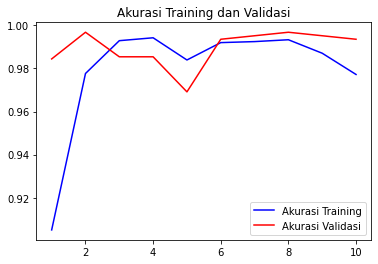

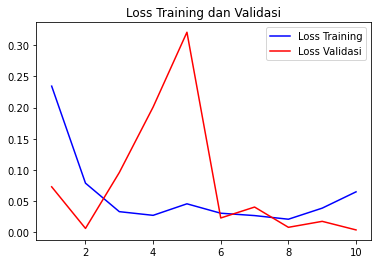

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(1, len(acc) + 1)

# Akurasi data Training dan Validasi
plt.plot(epochs, acc, 'b', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend()

plt.figure()
# Loss Training dan Validasi
plt.plot(epochs, loss, 'b', label='Loss Training')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator, verbose=1)
print("loss Testing adalah {}".format(loss))
print("Akurasi Testing adalah {}".format(accuracy))

11/11 [==============================] - 1s 122ms/step
loss Testing adalah 1.1920926823449918e-07
Akurasi Testing adalah 0.9969040155410767


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  shuffle=False)

resolt = model.predict_classes(test_generator, batch_size=None, verbose=1)

Found 323 images belonging to 2 classes.
11/11 [==============================] - 159s 14s/step


In [ ]:
resolt
#test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(test_generator.classes, resolt))

0.9969040247678018


## Confusion Matrix

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  shuffle=False)

Found 323 images belonging to 2 classes.


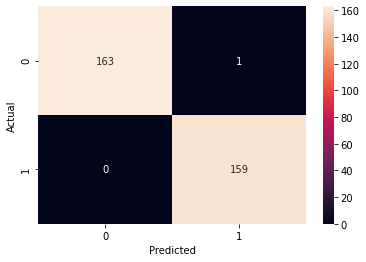

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


data = {'y_Actual':    test_generator.classes,
        'y_Predicted': resolt
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='.0f')
plt.show()

## Menyimpan Weight & Bias Arsitektur Model CNN UBNet

Source : https://www.tensorflow.org/guide/keras/save_and_serialize

In [ ]:
# Menyimpan model yan telah dibangun, meliputi : optimizer, architecture, weights dan konfigurasi training
from keras.models import load_model
model.save('model_ApTom.h5')

# Menyimpan bobot dari model
from keras.models import load_model
model.save_weights('ApTom_weights.h5')

# klasifikasi dari model
classes = train_generator.class_indices
classes

{'apel': 0, 'tomat': 1}

In [ ]:
print(classes['tomat'])

1


#Mengunakan Model yang suda dibuat untuk analisis data baru

Sistem Mendeteksi Citra Daun Apel 99.99094009399414 %
Sistem Mendeteksi Citra Daun Tomat 0.009059136209543794 %


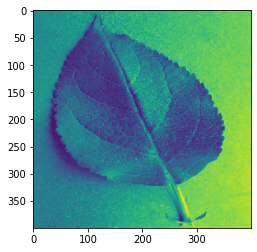

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pre-processing test data sama dengan train data
img_width = 400
img_height = 400
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(400,400,1),color_mode='grayscale')
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

result = model.predict_classes([prepare('/content/drive/My Drive/Data Warehouse/dataset_apel_tomat/test/apel/e10f9ab3-4775-4947-920a-d272329ae225___RS_HL 7946.JPG')])
result_2 = model.predict([prepare('/content/drive/My Drive/Data Warehouse/dataset_apel_tomat/test/apel/e10f9ab3-4775-4947-920a-d272329ae225___RS_HL 7946.JPG')])
disease = image.load_img('/content/drive/My Drive/Data Warehouse/dataset_apel_tomat/test/apel/e10f9ab3-4775-4947-920a-d272329ae225___RS_HL 7946.JPG',target_size=(400,400,1), color_mode='grayscale')
plt.imshow(disease)

print('Sistem Mendeteksi Citra Daun Apel', result_2[0, 0]*100, '%')
print('Sistem Mendeteksi Citra Daun Tomat', result_2[0, 1]*100, '%')
